In [5]:
import pandas as pd

try:
    df = pd.read_csv('crop_price_dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'crop_price_dataset.csv' not found.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,month,commodity_name,avg_modal_price,avg_min_price,avg_max_price,state_name,district_name,calculationType,change
0,2025-03-01,Maize,2341.58,2191.23,2402.98,India,All,Monthly,-14.43
1,2025-02-01,Maize,2356.01,2202.35,2414.46,India,All,Monthly,-26.19
2,2025-01-01,Maize,2382.20,2221.31,2448.22,India,All,Monthly,53.42
3,2024-12-01,Maize,2328.78,2164.86,2411.66,India,All,Monthly,55.32
4,2024-11-01,Maize,2273.46,2077.63,2377.78,India,All,Monthly,35.48


(2810, 9)


month               object
commodity_name      object
avg_modal_price    float64
avg_min_price      float64
avg_max_price      float64
state_name          object
district_name       object
calculationType     object
change             float64
dtype: object

Missing Values:
 month               0
commodity_name      0
avg_modal_price     0
avg_min_price       0
avg_max_price       0
state_name          0
district_name       0
calculationType     0
change             16
dtype: int64

Missing Value Percentage:
 month              0.000000
commodity_name     0.000000
avg_modal_price    0.000000
avg_min_price      0.000000
avg_max_price      0.000000
state_name         0.000000
district_name      0.000000
calculationType    0.000000
change             0.569395
dtype: float64


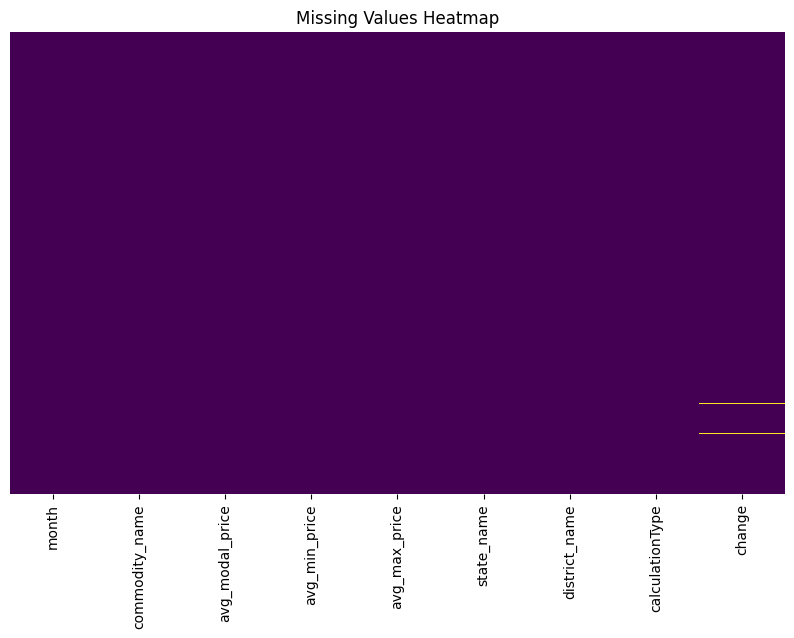

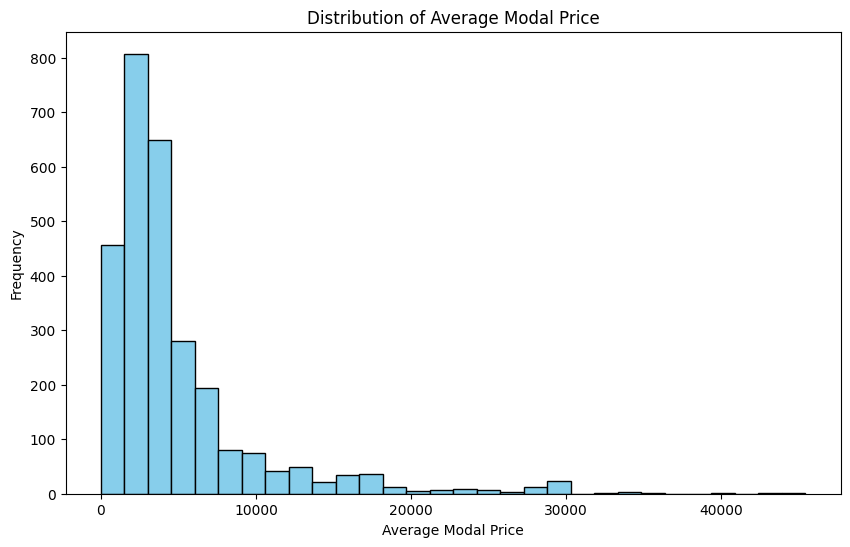

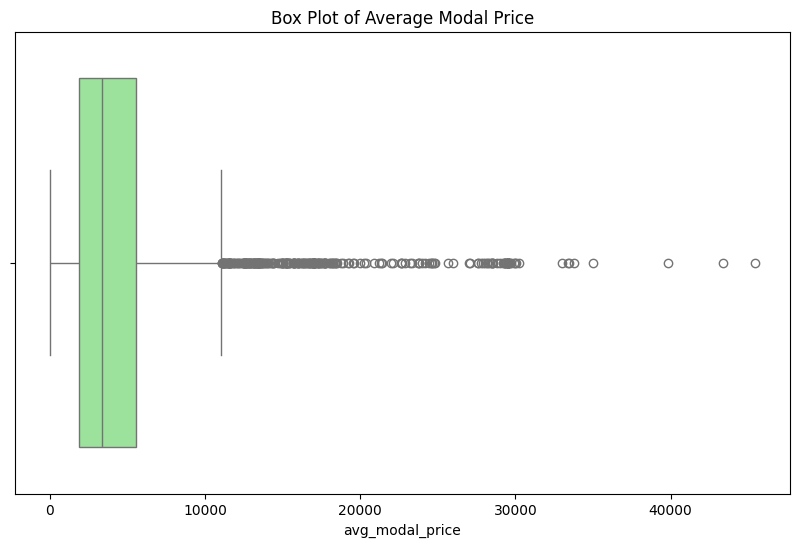

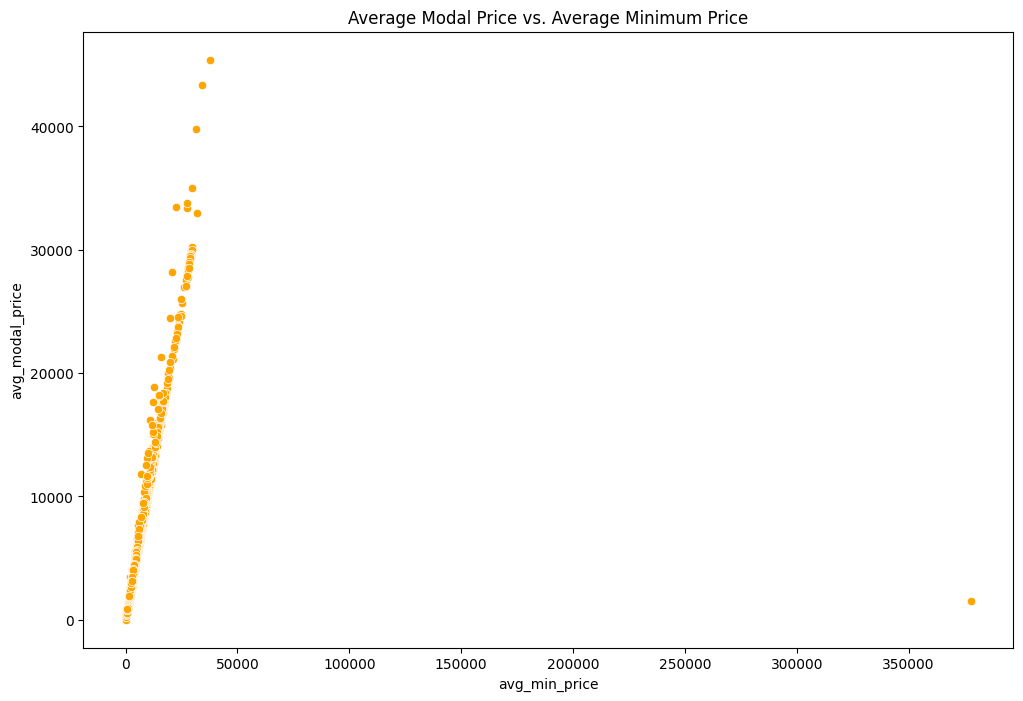

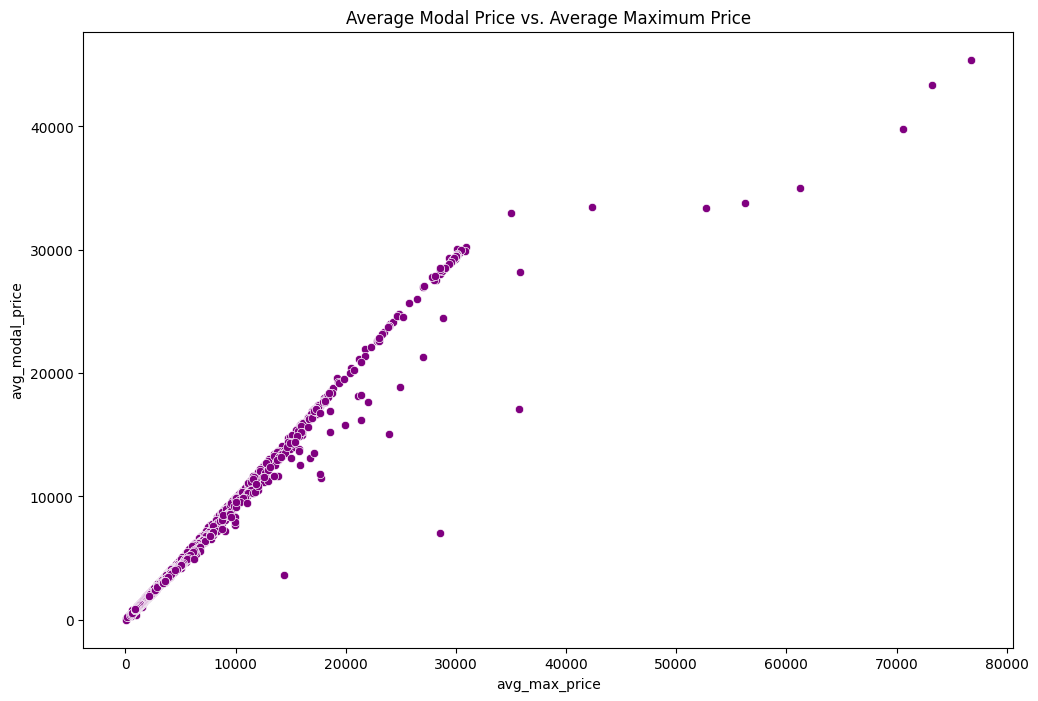

<ipython-input-6-4345245f95f0>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='commodity_name', y='avg_modal_price', data=df, palette="Set3")


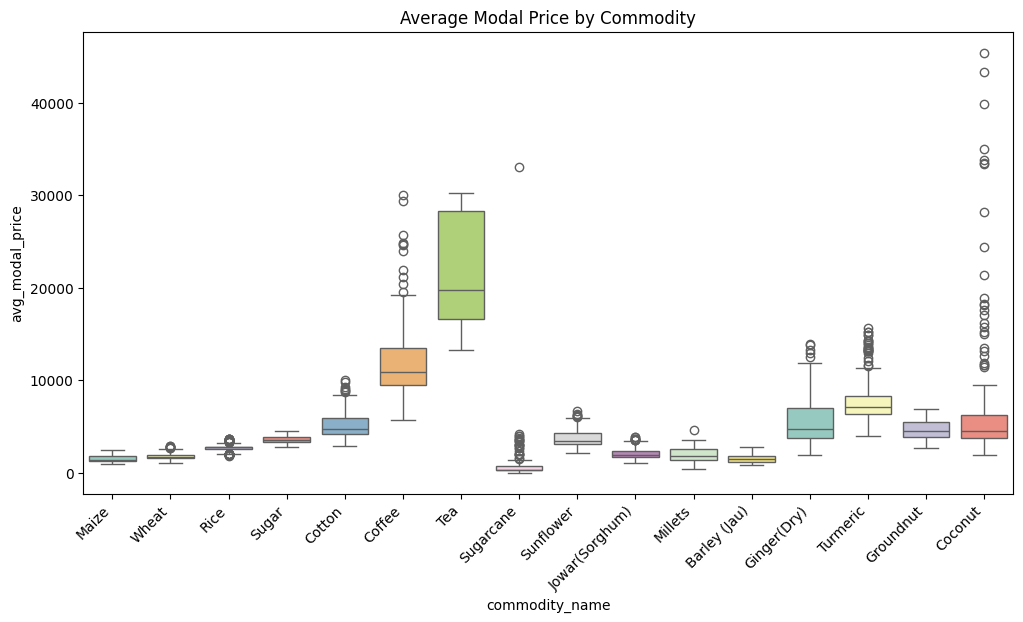

ValueError: could not convert string to float: '2025-03-01'

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print(df.dtypes)

# 2. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Visualize missing values (optional, but can be helpful)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# 3. Analyze the distribution of the target variable ('avg_modal_price')
plt.figure(figsize=(10, 6))
plt.hist(df['avg_modal_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Modal Price')
plt.xlabel('Average Modal Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['avg_modal_price'], color='lightgreen')
plt.title('Box Plot of Average Modal Price')
plt.show()

# 4. Explore relationships between target variable and predictor variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_min_price', y='avg_modal_price', data=df, color='orange')
plt.title('Average Modal Price vs. Average Minimum Price')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_max_price', y='avg_modal_price', data=df, color='purple')
plt.title('Average Modal Price vs. Average Maximum Price')
plt.show()

# Analyze categorical features (month, commodity_name, state_name, district_name)
# Example for 'commodity_name' (repeat for others as needed)
plt.figure(figsize=(12, 6))
sns.boxplot(x='commodity_name', y='avg_modal_price', data=df, palette="Set3")
plt.title('Average Modal Price by Commodity')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate correlation matrix (for numerical features)
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# 5. Summarize findings
print("\nSummary:")
print("Target Variable: avg_modal_price")
print("Potential Predictor Variables: avg_min_price, avg_max_price, month, commodity_name, state_name, district_name")
print("Initial Observations:")
print("- Data quality seems reasonable, with no significant missing values.") # Placeholder
print("- Further investigation needed for outliers and patterns in categorical features.")  # Placeholder



Correlation Matrix:
                  avg_modal_price  avg_min_price  avg_max_price     month  \
avg_modal_price         1.000000       0.559168       0.974716  0.025835   
avg_min_price           0.559168       1.000000       0.536919  0.038532   
avg_max_price           0.974716       0.536919       1.000000  0.024099   
month                   0.025835       0.038532       0.024099  1.000000   
change                  0.172494       0.090370       0.187211 -0.000884   

                   change  
avg_modal_price  0.172494  
avg_min_price    0.090370  
avg_max_price    0.187211  
month           -0.000884  
change           1.000000  


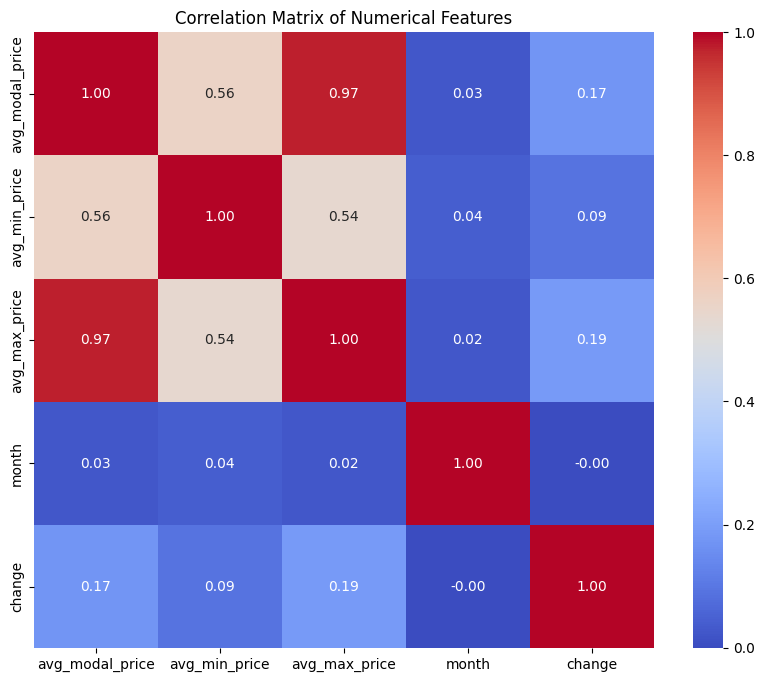

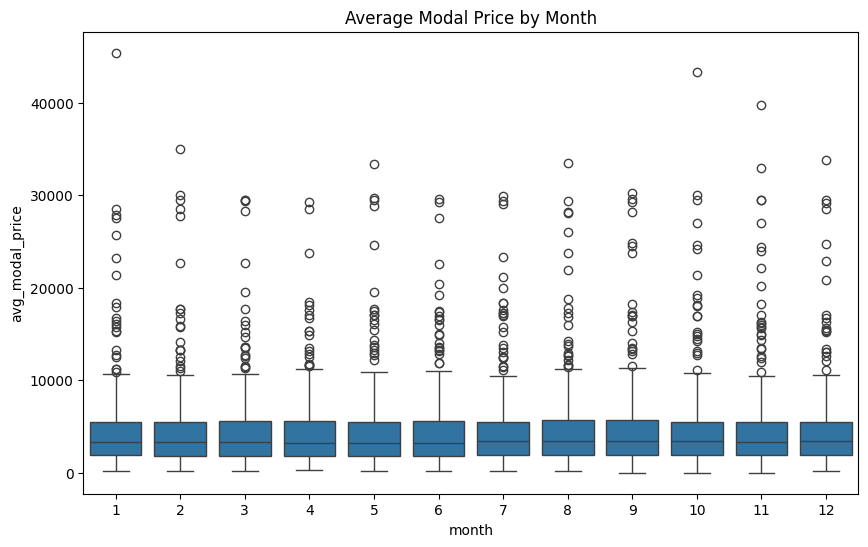


Summary:
Target Variable: avg_modal_price
Potential Predictor Variables: avg_min_price, avg_max_price, month, commodity_name, state_name, district_name, change
Initial Observations:
- The 'month' column has been converted to numerical representation for analysis.
- Missing values in 'change' were filled with the mean value.
- Further analysis needed to determine the impact of categorical variables and outliers.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'month' column to numerical representation (month number)
df['month'] = pd.to_datetime(df['month']).dt.month

# Handle missing values in 'change' column (fill with mean or median)
df['change'] = df['change'].fillna(df['change'].mean())


# Calculate correlation matrix (for numerical features)
numerical_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price', 'month', 'change']
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Explore relationship between month and avg_modal_price
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='avg_modal_price', data=df)
plt.title('Average Modal Price by Month')
plt.show()

print("\nSummary:")
print("Target Variable: avg_modal_price")
print("Potential Predictor Variables: avg_min_price, avg_max_price, month, commodity_name, state_name, district_name, change")
print("Initial Observations:")
print("- The 'month' column has been converted to numerical representation for analysis.")
print("- Missing values in 'change' were filled with the mean value.")
print("- Further analysis needed to determine the impact of categorical variables and outliers.")

In [8]:
import pandas as pd
import numpy as np

# Handling missing values (already handled for 'change' in previous step)
# Check for missing values in other columns
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Outlier detection and treatment for numerical features
numerical_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price']
for col in numerical_cols:
    # Using IQR to detect outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Winsorizing outliers
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Data type handling (if necessary) - already handled for 'month' column previously
# Check for other columns needing data type changes
print("\nData types per column:\n", df.dtypes)

# Duplicate removal
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicate rows removed. New shape: {df.shape}")

display(df.head())

Missing values per column:
 month              0
commodity_name     0
avg_modal_price    0
avg_min_price      0
avg_max_price      0
state_name         0
district_name      0
calculationType    0
change             0
dtype: int64

Data types per column:
 month                int32
commodity_name      object
avg_modal_price    float64
avg_min_price      float64
avg_max_price      float64
state_name          object
district_name       object
calculationType     object
change             float64
dtype: object

Number of duplicate rows: 2
Duplicate rows removed. New shape: (2808, 9)


,month,commodity_name,avg_modal_price,avg_min_price,avg_max_price,state_name,district_name,calculationType,change
0,3,Maize,2341.58,2191.23,2402.98,India,All,Monthly,-14.43
1,2,Maize,2356.01,2202.35,2414.46,India,All,Monthly,-26.19
2,1,Maize,2382.20,2221.31,2448.22,India,All,Monthly,53.42
3,12,Maize,2328.78,2164.86,2411.66,India,All,Monthly,55.32
4,11,Maize,2273.46,2077.63,2377.78,India,All,Monthly,35.48


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# One-hot encode categorical features
categorical_cols = ['commodity_name', 'state_name', 'district_name', 'calculationType']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scale numerical features using MinMaxScaler
numerical_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price', 'month', 'change']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,month,avg_modal_price,avg_min_price,avg_max_price,change,commodity_name_Coconut,commodity_name_Coffee,commodity_name_Cotton,commodity_name_Ginger(Dry),commodity_name_Groundnut,commodity_name_Jowar(Sorghum),commodity_name_Maize,commodity_name_Millets,commodity_name_Rice,commodity_name_Sugar,commodity_name_Sugarcane,commodity_name_Sunflower,commodity_name_Tea,commodity_name_Turmeric,commodity_name_Wheat
0,0.181818,0.212018,0.221885,0.198465,0.480472,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,0.090909,0.213328,0.223013,0.199417,0.480279,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,0.000000,0.215707,0.224938,0.202217,0.481589,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,1.000000,0.210855,0.219209,0.199185,0.481620,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,0.909091,0.205831,0.210355,0.196375,0.481293,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('avg_modal_price', axis=1)
y = df['avg_modal_price']

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['commodity_name_Maize']
)

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=X_temp['commodity_name_Maize']
)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Display first few rows of each set (optional)
display(X_train.head())
display(y_train.head())
display(X_val.head())
display(y_val.head())
display(X_test.head())
display(y_test.head())

X_train shape: (2246, 19)
y_train shape: (2246,)
X_val shape: (281, 19)
y_val shape: (281,)
X_test shape: (281, 19)
y_test shape: (281,)


,month,avg_min_price,avg_max_price,change,commodity_name_Coconut,commodity_name_Coffee,commodity_name_Cotton,commodity_name_Ginger(Dry),commodity_name_Groundnut,commodity_name_Jowar(Sorghum),commodity_name_Maize,commodity_name_Millets,commodity_name_Rice,commodity_name_Sugar,commodity_name_Sugarcane,commodity_name_Sunflower,commodity_name_Tea,commodity_name_Turmeric,commodity_name_Wheat
1359,0.090909,0.507796,0.479837,0.482034,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2606,0.727273,0.295875,0.293521,0.478870,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
756,0.181818,0.696860,0.624869,0.475659,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
206,0.272727,0.209114,0.194062,0.479968,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1071,0.181818,1.000000,0.948249,0.485712,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


,avg_modal_price
1359,0.493207
2606,0.299218
756,0.670721
206,0.199607
1071,1.000000


,month,avg_min_price,avg_max_price,change,commodity_name_Coconut,commodity_name_Coffee,commodity_name_Cotton,commodity_name_Ginger(Dry),commodity_name_Groundnut,commodity_name_Jowar(Sorghum),commodity_name_Maize,commodity_name_Millets,commodity_name_Rice,commodity_name_Sugar,commodity_name_Sugarcane,commodity_name_Sunflower,commodity_name_Tea,commodity_name_Turmeric,commodity_name_Wheat
1394,0.181818,0.602500,0.592589,0.496504,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
763,0.636364,0.774421,0.770497,0.491029,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
286,0.636364,0.170143,0.151720,0.480905,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1594,0.818182,0.171504,0.185117,0.479812,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
187,0.909091,0.270387,0.241725,0.482056,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


,avg_modal_price
1394,0.605675
763,0.800960
286,0.158549
1594,0.178852
187,0.254486


,month,avg_min_price,avg_max_price,change,commodity_name_Coconut,commodity_name_Coffee,commodity_name_Cotton,commodity_name_Ginger(Dry),commodity_name_Groundnut,commodity_name_Jowar(Sorghum),commodity_name_Maize,commodity_name_Millets,commodity_name_Rice,commodity_name_Sugar,commodity_name_Sugarcane,commodity_name_Sunflower,commodity_name_Tea,commodity_name_Turmeric,commodity_name_Wheat
1864,0.454545,0.107328,0.092474,0.480388,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
221,0.000000,0.189524,0.169393,0.480962,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2660,0.454545,0.380098,0.387812,0.481992,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
601,0.909091,0.351557,0.296509,0.480453,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
791,0.272727,0.380281,0.371073,0.471462,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


,avg_modal_price
1864,0.098695
221,0.177859
2660,0.382908
601,0.318336
791,0.377687


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
linear_pred = linear_model.predict(X_val)
rf_pred = rf_model.predict(X_val)
gb_pred = gb_model.predict(X_val)

# Calculate MSE
linear_mse = mean_squared_error(y_val, linear_pred)
rf_mse = mean_squared_error(y_val, rf_pred)
gb_mse = mean_squared_error(y_val, gb_pred)

print(f"Linear Regression MSE: {linear_mse}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")

Linear Regression MSE: 2.7201034366875152e-05
Random Forest MSE: 2.1574595863623058e-05
Gradient Boosting MSE: 3.1129768341308945e-05


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,  # Increase verbosity for more detailed output
    random_state=42,
    n_jobs=-1 # Use all available processors
)


# Fit the RandomizedSearchCV object to the training data
rf_random.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", rf_random.best_params_)

# Print the best score
print("Best Score:", rf_random.best_score_)

# Train a new model with the best hyperparameters
best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred = best_random.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}
Best Score: -0.00010752912430316221
Mean Squared Error on Validation Set: 2.0289538335708847e-05


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Use the best_random model to predict on the test set
y_pred = best_random.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.00019728091927196403
Root Mean Squared Error (RMSE): 0.014045672617285511
Mean Absolute Error (MAE): 0.0033772897185683783
R-squared (R2) Score: 0.9975459388596877


In [14]:
# Model evaluation (using the best_random model)
y_pred = best_random.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.00019728091927196403
Root Mean Squared Error (RMSE): 0.014045672617285511
Mean Absolute Error (MAE): 0.0033772897185683783
R-squared (R2) Score: 0.9975459388596877


In [15]:
import joblib

# Save the best model
joblib.dump(best_random, 'best_random_forest_model.pkl')
print("Best Random Forest model saved to 'best_random_forest_model.pkl'")


Best Random Forest model saved to 'best_random_forest_model.pkl'


In [17]:
# Save the scaler
joblib.dump(scaler, 'min_max_scaler.pkl')

# Save the model columns
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

# Save the original numerical and categorical columns
original_numerical_cols = ['avg_min_price', 'avg_max_price', 'month', 'change']
original_categorical_cols = ['commodity_name', 'state_name', 'district_name', 'calculationType']
joblib.dump(original_numerical_cols, 'original_numerical_cols.pkl')
joblib.dump(original_categorical_cols, 'original_categorical_cols.pkl')


['original_categorical_cols.pkl']